In [29]:
import scanpy as sc
import scipy.sparse as sp
import os

In [27]:
# Download samples (5.7 MB and 12.2 MB)
if not os.path.exists('data'):
    os.makedirs('data')
!wget -O data/adult_mouse_brain_ST4k.h5ad "https://drive.usercontent.google.com/download?id=1lRM-tR1MMbtgyKXLqRzV2YxokweiNUMz&export=download&authuser=0"
!wget -O data/adult_mouse_brain_SC4k.h5ad "https://drive.usercontent.google.com/download?id=1tl1ehiAVpSnoAFzqjohq4Q_vl3Sj1DOG&export=download&authuser=0"

--2024-09-02 11:22:11--  https://drive.usercontent.google.com/download?id=1lRM-tR1MMbtgyKXLqRzV2YxokweiNUMz&export=download&authuser=0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.201.193
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.201.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5711421 (5.4M) [application/octet-stream]
Saving to: 'adult_mouse_brain_ST4k.h5ad'

adult_mouse_brain_S 100%[===================>]   5.45M  1.50MB/s    in 4.0s    

2024-09-02 11:22:18 (1.37 MB/s) - 'adult_mouse_brain_ST4k.h5ad' saved [5711421/5711421]

--2024-09-02 11:22:18--  https://drive.usercontent.google.com/download?id=1tl1ehiAVpSnoAFzqjohq4Q_vl3Sj1DOG&export=download&authuser=0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.201.193
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.201.193|:443... connected.
HTTP request sent, awaiti

# Run CoDi

Install CoDi package from pip repository:
```
pip install --upgrade codi-bg
```

In [ ]:
!CoDi --sc_path data/adult_mouse_brain_SC4k.h5ad --st_path data/adult_mouse_brain_ST4k.h5ad \
    -a "cell_subclass" -v 

# Run CoDi from Docker image

In [43]:
! docker run --rm \
    -v "${PWD}/data:/data" \
    vladimirkovacevic/codi \
    --sc_path /data/adult_mouse_brain_SC4k.h5ad \
    --st_path /data/adult_mouse_brain_ST4k.h5ad \
    -a "cell_subclass" -v --epochs 3 --out_path /data

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
2024-09-02 15:28:20,344 __main__     INFO     Using 309 unique single cell marker genes that exist in ST dataset (100 per cell type)
2024-09-02 15:28:20,347 __main__     INFO     Calculation of marker genes took 2.27
2024-09-02 15:28:21,034 core.contrastive INFO     Auto calculated augmentation percentage is 0.52

2024-09-02 15:28:21,419 __main__     INFO     Starting parallel per cell calculation of distances.
2024-09-02 15:28:24,056 core.contrastive INFO     Input ready...
2024-09-02 15:28:24,061 core.contrastive INFO     Labels ready...
2024-09-02 15:28:24,075 core.contrastive INFO     Fitting a model with: 
 - embedding dim: 32 
 - encoder depth: 4 
 - classifier depth: 2 
 - epochs: 3
2024-09-02 15:28:42,038 core.contrastive INFO     Epoch 1 took 17.92s
2024-09-02 15:28:52,207 cor

# View results

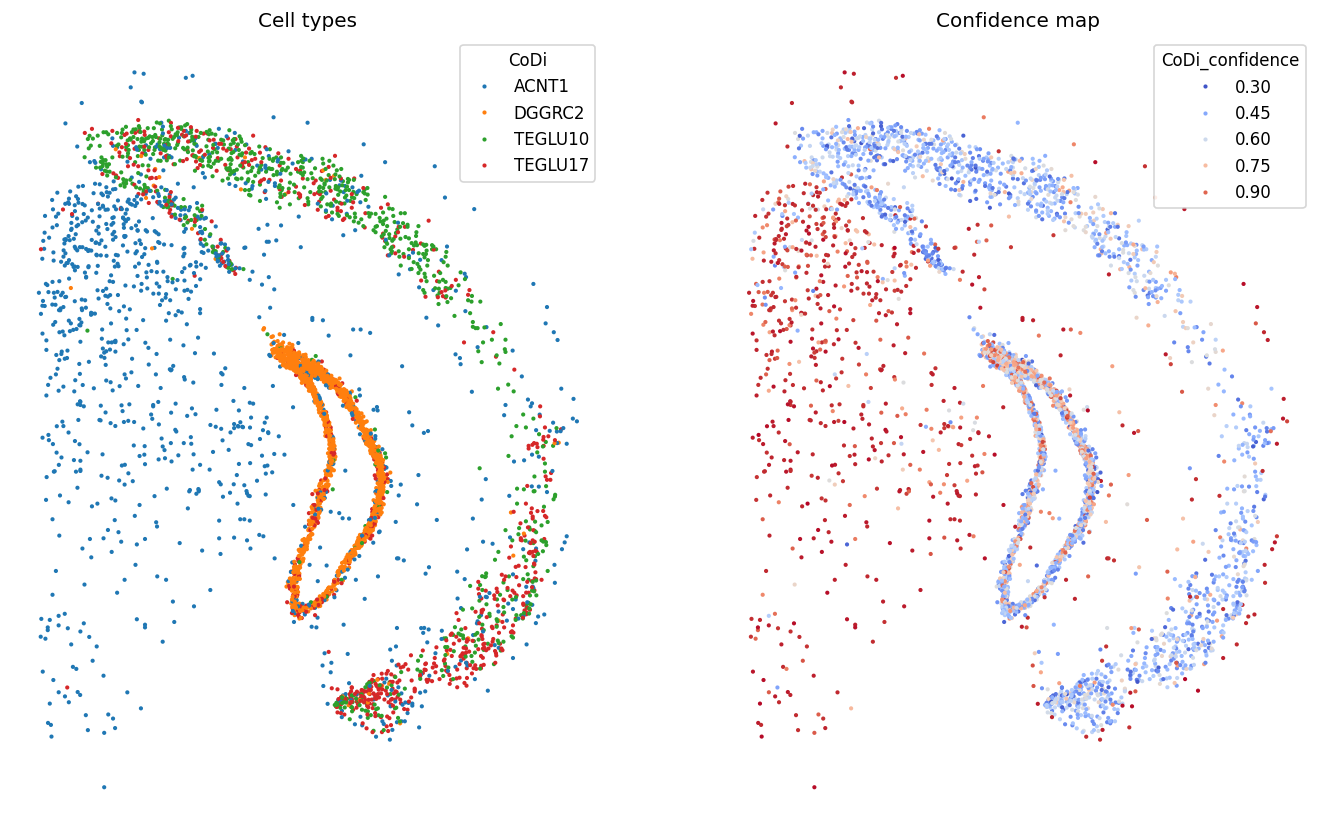

In [44]:
from IPython.display import Image
display(Image(filename='data/adult_mouse_brain_ST4k_CoDi_KLD.png'))

In [48]:
# Read annotations and their confidences
adata = sc.read_h5ad('data/adult_mouse_brain_ST4k_CoDi_KLD.h5ad')
adata.obs.head()
# "CoDi" label contains final annotation, combination of annotation assigned by statistical distance-based algorithm
# (CoDi_dist) and deep neural network based on contrastive learning (CoDi_contrastive)

,n_genes_by_counts,CoDi_dist,CoDi_confidence_dist,CoDi_contrastive,CoDi_confidence_contrastive,CoDi,CoDi_confidence
cell_id,,,,,,,
SS200000141TL_B5-41021.0-0,3178,DGGRC2,0.7,DGGRC2,0.743,DGGRC2,0.721
SS200000141TL_B5-45714.0-0,2564,ACNT1,0.6,ACNT1,0.860,ACNT1,0.730
SS200000141TL_B5-9573.0-0,3139,TEGLU10,0.5,TEGLU10,0.307,TEGLU10,0.403
SS200000141TL_B5-12807.0-0,2433,ACNT1,1.0,ACNT1,0.913,ACNT1,0.956
SS200000141TL_B5-20601.0-0,3371,TEGLU10,0.9,TEGLU10,0.516,TEGLU10,0.708
